In [94]:
import pandas as pd
import matplotlib.pyplot as plt

In [95]:
df=pd.read_csv("/kaggle/input/time-series-datasets/daily-minimum-temperatures-in-me.csv")

In [96]:
df.head()

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8


In [97]:
df=df[:365] # only for one year

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        365 non-null    object
 1   Daily minimum temperatures  365 non-null    object
dtypes: object(2)
memory usage: 5.8+ KB


In [99]:
datas=df['Daily minimum temperatures'].astype(float)

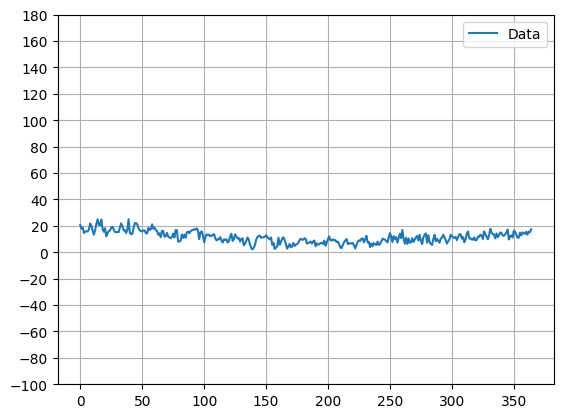

In [100]:
plt.plot(datas, linestyle='-',  label='Data')
plt.grid(True)
plt.yticks([i for i in range(-100,200,20)])

plt.legend()
plt.show()

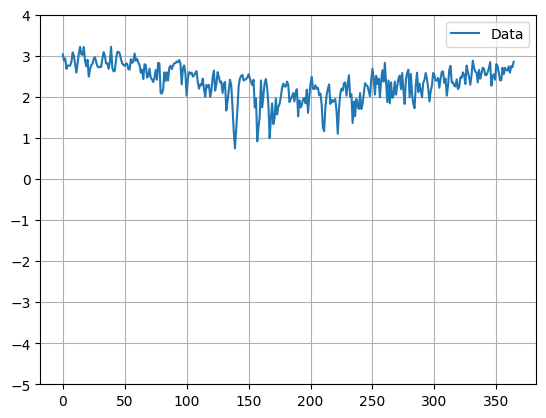

In [101]:
import numpy as np
datas=np.log(datas)

plt.plot(datas, linestyle='-',  label='Data')
plt.grid(True)
plt.yticks([i for i in range(-5,5,1)])

plt.legend()
plt.show()

In [102]:
msk = (datas.index < len(df)-30)
df_train = datas[msk].copy()
df_test = datas[~msk].copy()

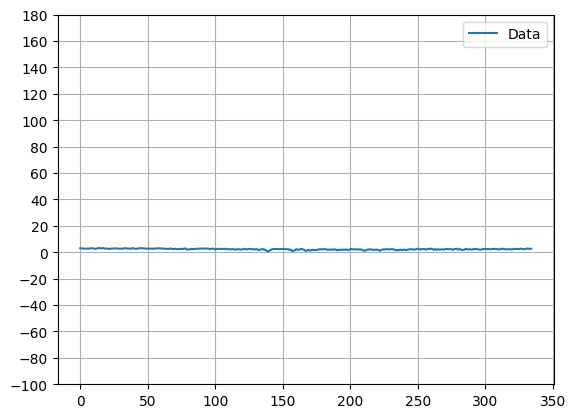

In [103]:
plt.plot(df_train, linestyle='-',  label='Data')
plt.grid(True)
plt.yticks([i for i in range(-100,200,20)])

plt.legend()
plt.show()

In [104]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')

p-value: 0.015258247899961625


<Axes: >

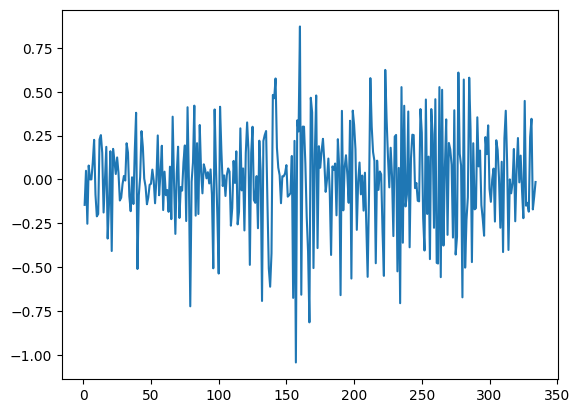

In [105]:
df_train_diff = df_train.diff().dropna()
df_train_diff.plot()

In [106]:
adf_test = adfuller(df_train_diff)
print(f'p-value: {adf_test[1]}')

p-value: 7.391085244500088e-12


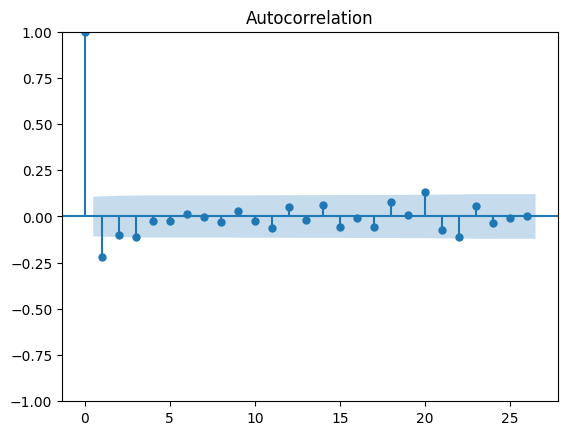

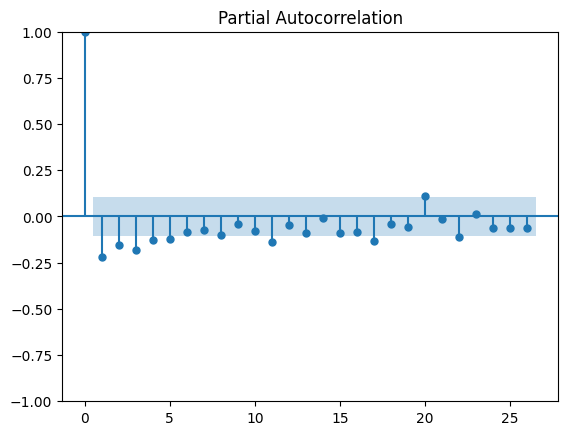

In [107]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(df_train_diff)

pacf_original = plot_pacf(df_train_diff)

In [108]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())

                                   SARIMAX Results                                    
Dep. Variable:     Daily minimum temperatures   No. Observations:                  335
Model:                         ARIMA(2, 1, 2)   Log Likelihood                 -19.156
Date:                        Thu, 25 Jul 2024   AIC                             48.312
Time:                                21:50:51   BIC                             67.368
Sample:                                     0   HQIC                            55.910
                                        - 335                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4312      0.094     -4.594      0.000      -0.615      -0.247
ar.L2          0.5278      0.061      8.622      0.000       0.408 

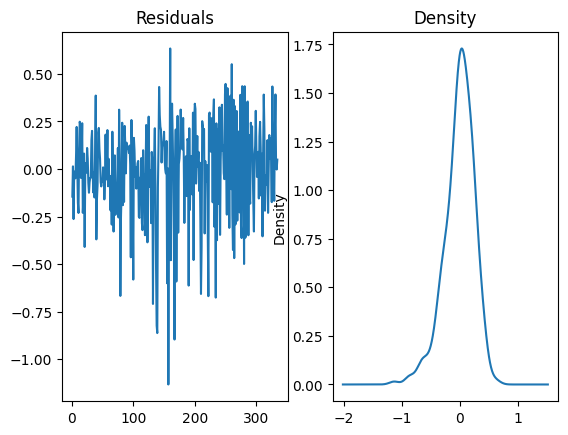

In [109]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

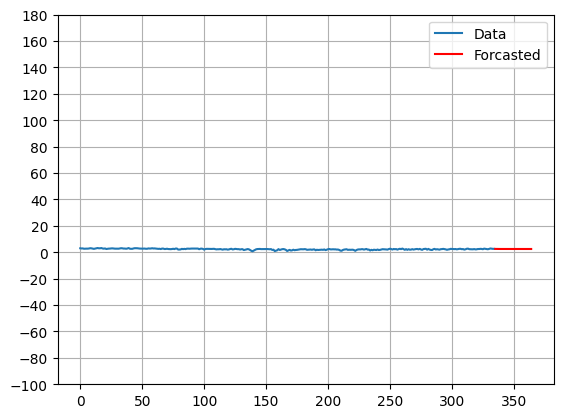

In [110]:
forecast_test = model_fit.forecast(len(df_test))

df_answer = [None]*len(df_train)+list(forecast_test)
plt.plot(df_train, linestyle='-',  label='Data')
plt.plot(df_answer,linestyle='-',label='Forcasted',color='r')
plt.grid(True)
plt.yticks([i for i in range(-100,200,20)])

plt.legend()
plt.show()

In [111]:
! pip install pmdarima

In [112]:
import pmdarima as pm
auto_arima = pm.auto_arima(df_train, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True)

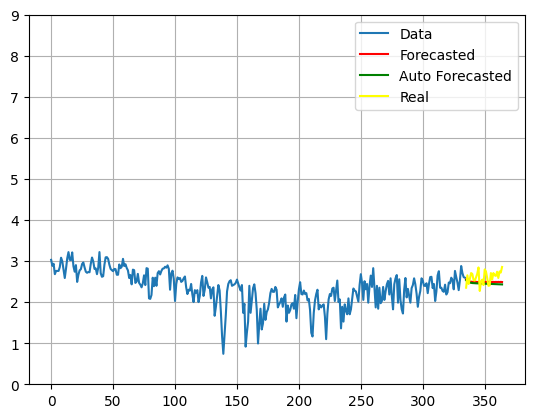

In [115]:
forecast_test_auto = auto_arima.predict(n_periods=len(df_test))
df_answer_auto = [None]*len(df_train) + list(forecast_test_auto)

plt.plot(df_train, linestyle='-',  label='Data')
plt.plot(df_answer,linestyle='-',label='Forecasted',color='red')
plt.plot(df_answer_auto,linestyle='-',label='Auto Forecasted',color='green')
plt.plot(df_test,linestyle='-',label='Real',color='yellow')
plt.grid(True)
plt.yticks([i for i in range(0,10,1)])

plt.legend()
plt.show()